In [5]:
using CancerSeqSim
using RCall

In [6]:
# constants for simulations
μ = 8.0 #mutation rate
b = log(2)
d = 0.5 * log(2) # death rate which gives β = 0.5
println("Effective mutation rate = $(μ / ((b-d)/b))")
clonalmuts = 150 #number of clonal mutations

read_depth = 150.0
ρ = 0.0
cellularity = 1.0
ploidy = 4

Effective mutation rate = 16.0


4

Effective mutation rate is $\mu / \beta = 8/0.5 = 16$ per tumour doubling per genome

In [7]:
srand(1234) #set random seed

Nmax = 10^4

#simulate a neutral tumour (nclones = 0) with 4 genomes
data = simulate(nclones = 0, read_depth = read_depth, ρ = ρ, ploidy = ploidy, 
    μ = μ, clonalmutations = clonalmuts, d = d, cellularity = cellularity, Nmax = Nmax);

#add mutations that will have accumulated prior to WGD that the simulation does not take into account
# and would be expected to be at allele frequency 0.5
clonalmutations_preWGD = fill(1.0, 450)*Nmax #generate 450 mutations with CCF 1

#sample mutations to produce sequencing noise
x = CancerSeqSim.sampledhist(clonalmutations_preWGD, Nmax; 
    ploidy = 2.0, read_depth = read_depth, cellularity = cellularity)

#append pre WGD clonal mutations
VAF = append!(data.sampleddata.VAF, x.VAF);


 Standard deviation of clonal peak is calculated to be 0.0816496580927726
 Mean of peak is 0.5. 
 Using integration range - (0.05,0.34)
 Standard deviation of clonal peak is calculated to be 0.0816496580927726
 Mean of peak is 0.25. 
 Using integration range - (0.05,0.09)


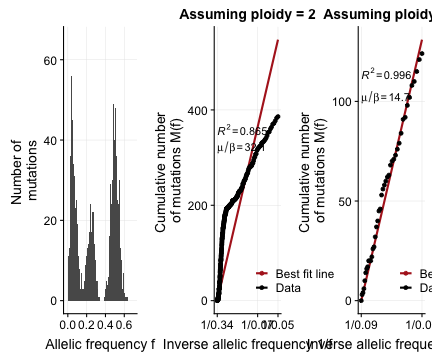

RCall.RObject{RCall.VecSxp}


In [8]:
@rput VAF
R"""
library(neutralitytestr)
library(cowplot)

#neutralitytestr package will deterimine appropriate integration range based on ploidy
x1 <- neutralitytest(VAF, read_depth = 150, ploidy = 2, fmin = 0.05, cellularity = 1.0)
x2 <- neutralitytest(VAF, read_depth = 150, ploidy = 4, fmin = 0.05, cellularity = 1.0)

g <- plot_grid(vaf_histogram(x1) + ggtitle("") + ylim(c(0, 65)), 
    lsq_plot(x1) + ggtitle("Assuming ploidy = 2"), 
    lsq_plot(x2) + ggtitle("Assuming ploidy = 4"), ncol = 3)

save_plot("FigureS1.pdf", g, base_height = 5, base_width = 12)

g
"""